<a href="https://colab.research.google.com/github/gyeongdong13/Project/blob/main/LSTM(%EB%8C%80%EC%B6%9C%ED%8F%89%EC%9E%94%EB%82%B4%EC%97%AD)_%EC%88%98%EC%9B%90%EC%8B%9C%EC%B2%AD%2C%EA%B3%A1%EB%B0%98_%EC%A0%9C%EC%99%B8(20%EA%B0%9C_%ED%8F%B4%EB%93%9C_%EC%B5%9C%EC%A2%85).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import ReduceLROnPlateau
import math
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/My Drive/데이터 청년 캠퍼스/농협 프로젝트/데이터 모음/시계열 예측(대출 평잔내역) - 수원시청,곡반 제외.csv', encoding='utf-8')
df.head(5)

,연도,고등동,궐동,기안,남수원,남양,동탄목동,동탄테크노벨리,발안,병점,...,세교,송산그린시티,오목천,오산,율전동,정자동,진안,탑동,파장동,화서동
0,20년 1월,73245,77912,67668,71614,169082,18110,44765,149360,70018,...,63261,3494,70610,71834,57051,59960,72676,84726,49861,86091
1,20년 2월,72944,78130,67290,71345,168398,16215,44831,148622,69592,...,61437,4449,71141,70785,57583,59224,74689,82655,49894,85378
2,20년 3월,71757,79495,67417,71839,167714,17324,45538,147164,69834,...,59898,5130,71370,71451,55672,59233,73844,81403,50145,83557
3,20년 4월,71801,80940,68586,72007,166669,18726,50483,146723,69607,...,60455,5779,71115,71985,56160,59545,73751,78364,50429,82765
4,20년 5월,71542,81502,68251,72077,167803,20828,52089,149997,68920,...,61628,6723,71003,74516,57346,60048,74292,77560,51582,82359


In [ ]:
df["연도"] = df["연도"].astype(str)

# 구매일자를 날짜형 데이터로 변환
from datetime import datetime

df["연월"] = pd.to_datetime(df["연도"], format="%y년 %m월").dt.strftime("%Y-%m")
df.head(5)

,연도,고등동,궐동,기안,남수원,남양,동탄목동,동탄테크노벨리,발안,병점,...,송산그린시티,오목천,오산,율전동,정자동,진안,탑동,파장동,화서동,연월
0,20년 1월,73245,77912,67668,71614,169082,18110,44765,149360,70018,...,3494,70610,71834,57051,59960,72676,84726,49861,86091,2020-01
1,20년 2월,72944,78130,67290,71345,168398,16215,44831,148622,69592,...,4449,71141,70785,57583,59224,74689,82655,49894,85378,2020-02
2,20년 3월,71757,79495,67417,71839,167714,17324,45538,147164,69834,...,5130,71370,71451,55672,59233,73844,81403,50145,83557,2020-03
3,20년 4월,71801,80940,68586,72007,166669,18726,50483,146723,69607,...,5779,71115,71985,56160,59545,73751,78364,50429,82765,2020-04
4,20년 5월,71542,81502,68251,72077,167803,20828,52089,149997,68920,...,6723,71003,74516,57346,60048,74292,77560,51582,82359,2020-05


In [ ]:
year_month = list(df["연월"].unique())
year_month

['2020-01',
 '2020-02',
 '2020-03',
 '2020-04',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12',
 '2021-01',
 '2021-02',
 '2021-03',
 '2021-04',
 '2021-05',
 '2021-06',
 '2021-07',
 '2021-08',
 '2021-09',
 '2021-10',
 '2021-11',
 '2021-12',
 '2022-01',
 '2022-02',
 '2022-03',
 '2022-04',
 '2022-05',
 '2022-06',
 '2022-07',
 '2022-08',
 '2022-09',
 '2022-10',
 '2022-11',
 '2022-12']

In [ ]:
df = df.drop(columns=["연도"])
df.head(5)

,고등동,궐동,기안,남수원,남양,동탄목동,동탄테크노벨리,발안,병점,삼환,...,송산그린시티,오목천,오산,율전동,정자동,진안,탑동,파장동,화서동,연월
0,73245,77912,67668,71614,169082,18110,44765,149360,70018,53995,...,3494,70610,71834,57051,59960,72676,84726,49861,86091,2020-01
1,72944,78130,67290,71345,168398,16215,44831,148622,69592,54809,...,4449,71141,70785,57583,59224,74689,82655,49894,85378,2020-02
2,71757,79495,67417,71839,167714,17324,45538,147164,69834,55519,...,5130,71370,71451,55672,59233,73844,81403,50145,83557,2020-03
3,71801,80940,68586,72007,166669,18726,50483,146723,69607,53808,...,5779,71115,71985,56160,59545,73751,78364,50429,82765,2020-04
4,71542,81502,68251,72077,167803,20828,52089,149997,68920,53873,...,6723,71003,74516,57346,60048,74292,77560,51582,82359,2020-05


In [ ]:
df2 = df.drop(columns=["연월"])
df2.head(5)

,고등동,궐동,기안,남수원,남양,동탄목동,동탄테크노벨리,발안,병점,삼환,세교,송산그린시티,오목천,오산,율전동,정자동,진안,탑동,파장동,화서동
0,73245,77912,67668,71614,169082,18110,44765,149360,70018,53995,63261,3494,70610,71834,57051,59960,72676,84726,49861,86091
1,72944,78130,67290,71345,168398,16215,44831,148622,69592,54809,61437,4449,71141,70785,57583,59224,74689,82655,49894,85378
2,71757,79495,67417,71839,167714,17324,45538,147164,69834,55519,59898,5130,71370,71451,55672,59233,73844,81403,50145,83557
3,71801,80940,68586,72007,166669,18726,50483,146723,69607,53808,60455,5779,71115,71985,56160,59545,73751,78364,50429,82765
4,71542,81502,68251,72077,167803,20828,52089,149997,68920,53873,61628,6723,71003,74516,57346,60048,74292,77560,51582,82359


In [ ]:
transposed_df = df2.transpose()
transposed_df.columns = df["연월"]
transposed_df

연월,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
고등동,73245,72944,71757,71801,71542,71813,72863,73186,73872,75021,...,94901,95240,96404,96574,95979,96095,96748,100767,101069,101708
궐동,77912,78130,79495,80940,81502,82427,83793,83452,82542,83121,...,92076,91262,92303,91620,91748,90888,92141,94958,95517,95252
기안,67668,67290,67417,68586,68251,68897,66547,66636,69882,72357,...,78918,78899,79506,79461,81536,81454,81873,82634,83036,82643
남수원,71614,71345,71839,72007,72077,71419,71625,72298,72035,70839,...,84674,85359,84973,83199,84126,83541,81172,85177,86463,87047
남양,169082,168398,167714,166669,167803,167833,165771,164640,164179,169787,...,179794,180382,180188,179263,177894,177768,181297,184779,184024,182647
동탄목동,18110,16215,17324,18726,20828,22073,24836,27028,28138,28610,...,46380,47464,44794,42990,43050,42490,43001,45593,47282,49213
동탄테크노벨리,44765,44831,45538,50483,52089,52385,51928,51748,52742,52445,...,77464,77440,77843,81685,82077,82621,83502,84003,86074,86265
발안,149360,148622,147164,146723,149997,151103,150993,158297,166072,168005,...,181863,182670,183943,184354,185053,186084,188209,196337,199850,199287
병점,70018,69592,69834,69607,68920,69373,69379,68972,67829,66081,...,65506,68786,70416,69487,68942,68971,68046,68452,71502,71532
삼환,53995,54809,55519,53808,53873,54267,54604,55196,57053,57657,...,71707,71846,70124,69696,70707,70771,70534,70932,74108,74270


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Min-Max 스케일러 생성
scaler = MinMaxScaler()
transposed_df_scaled = scaler.fit_transform(transposed_df)
transposed_df_scaled = pd.DataFrame(transposed_df_scaled, columns=transposed_df.columns)
transposed_df_scaled

연월,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
0,0.421232,0.417782,0.409800,0.410355,0.402403,0.401439,0.408899,0.409818,0.407813,0.402936,...,0.431138,0.429889,0.433320,0.427957,0.419153,0.419871,0.416759,0.419049,0.410931,0.406244
1,0.449417,0.449414,0.457394,0.467158,0.464235,0.467603,0.478438,0.476068,0.463499,0.453969,...,0.412658,0.403949,0.406773,0.395673,0.391563,0.386303,0.387380,0.383737,0.377822,0.366960
2,0.387552,0.383296,0.383107,0.390372,0.381972,0.383261,0.368716,0.367549,0.382186,0.386152,...,0.326585,0.323333,0.323932,0.316435,0.324971,0.325486,0.321902,0.308822,0.303393,0.290236
3,0.411382,0.408029,0.410305,0.411635,0.405724,0.398983,0.401023,0.404088,0.396014,0.376588,...,0.364238,0.365457,0.359322,0.340795,0.341861,0.338940,0.317431,0.324280,0.323830,0.317034
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.987842,1.000000,...,0.986466,0.985080,0.975692,0.966823,0.953317,0.946390,0.955923,0.929741,0.905623,0.898748
5,0.088267,0.071766,0.075001,0.080471,0.087565,0.091374,0.103341,0.111946,0.114070,0.110528,...,0.113737,0.118352,0.099225,0.078762,0.074006,0.074298,0.074017,0.083657,0.090178,0.086819
6,0.249239,0.246308,0.248536,0.277854,0.281636,0.280330,0.275707,0.271472,0.272098,0.260698,...,0.317073,0.313819,0.313166,0.330929,0.328499,0.333009,0.332290,0.317143,0.321510,0.312276
7,0.880897,0.879377,0.873604,0.876027,0.889459,0.895710,0.905979,0.959067,1.000000,0.988773,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8,0.401744,0.397337,0.397973,0.396718,0.386125,0.386228,0.386734,0.382624,0.368999,0.346610,...,0.238850,0.257388,0.265088,0.251437,0.242847,0.245012,0.233728,0.222612,0.234611,0.222627
9,0.304980,0.307169,0.309926,0.298521,0.292712,0.292062,0.292732,0.293723,0.299787,0.293536,...,0.279414,0.277342,0.263198,0.252799,0.254356,0.256616,0.249593,0.237687,0.250152,0.239288


In [ ]:
data = transposed_df.loc[:,'2020-01':'2021-12']
target = transposed_df.loc[:,'2022-01':'2022-12']

data_scaler = MinMaxScaler()
data_scaled = data_scaler.fit_transform(data)

target_scaler = MinMaxScaler()
target_scaled = target_scaler.fit_transform(target)

In [ ]:
np.shape(data)

(20, 24)

In [ ]:
data = np.array(data)
data = np.reshape(data, (data.shape[0], data.shape[1],1))
np.shape(data)

(20, 24, 1)

In [ ]:
# from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(data_scaled, target_scaled, test_size=0.2, shuffle = False)

In [ ]:
# x_train_shape = np.shape(x_train)
# y_train_shape = np.shape(y_train)
# x_test_shape = np.shape(x_test)
# y_test_shape = np.shape(y_test)

# print('x_train:',x_train_shape, 'y_train:',y_train_shape)
# print('x_test:',x_test_shape, 'y_test:',y_test_shape)

In [ ]:
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# 데이터 분할 수
n_splits = 20

# 데이터를 분할하여 각 폴드에 대해 모델 학습 및 평가
fold_size = len(data_scaled) // n_splits
mape_scores = []

fold_losses = []
validation = []
prediction = []

for fold_idx in range(n_splits):
    start_idx = fold_idx * fold_size
    end_idx = start_idx + fold_size

    x_fold_train = np.concatenate((data_scaled[:start_idx], data_scaled[end_idx:]))
    y_fold_train = np.concatenate((target_scaled[:start_idx], target_scaled[end_idx:]))
    x_fold_val = data_scaled[start_idx:end_idx]
    y_fold_val = target_scaled[start_idx:end_idx]


    # 모델 생성 및 컴파일
    model = Sequential()
    model.add(LSTM(20, activation='relu', input_shape=(24, 1)))
    model.add(Dense(16))
    model.add(Dropout(0.1))
    model.add(Dense(12))
    model.compile(optimizer='adam', loss='mse')

    # Early Stopping 설정
    early_stopping = EarlyStopping(monitor='loss', patience=100, mode='auto')
    # loss값을 모니터해서 과적합이 생기면 100번 더 돌고 끊음
    # mode=auto loss면 최저값이100번정도 반복되면 정지, acc면 최고값이 100번정도 반복되면 정지
    # mode=min, mode=max


    # 모델 학습
    history = model.fit(x_fold_train, y_fold_train, epochs=1000, batch_size=1, verbose=2,
                        callbacks=[early_stopping], validation_data=(x_fold_val, y_fold_val))

    fold_losses.append(history.history['val_loss'])

    # 예측
    predictions = model.predict(x_fold_val)

    # 정규화한 것을 실제값으로 변환
    val = target_scaler.inverse_transform(y_fold_val)
    predic = target_scaler.inverse_transform(predictions)
    validation.append(val)
    prediction.append(predic)

    # MAPE 계산
    absolute_percentage_errors = np.abs((val - predic) / val)
    fold_mape = np.mean(absolute_percentage_errors) * 100
    mape_scores.append(fold_mape)

    print(f"Fold {fold_idx+1} MAPE: {fold_mape:.4f}")

# 전체 K-Fold 교차검증의 평균 MAPE 계산
average_mape = np.mean(mape_scores)
print(f"Average MAPE: {average_mape:.4f}")

Epoch 1/1000
19/19 - 2s - loss: 0.1702 - val_loss: 0.1177 - 2s/epoch - 99ms/step
Epoch 2/1000
19/19 - 0s - loss: 0.1250 - val_loss: 0.0745 - 160ms/epoch - 8ms/step
Epoch 3/1000
19/19 - 0s - loss: 0.0805 - val_loss: 0.0322 - 128ms/epoch - 7ms/step
Epoch 4/1000
19/19 - 0s - loss: 0.0502 - val_loss: 0.0096 - 150ms/epoch - 8ms/step
Epoch 5/1000
19/19 - 0s - loss: 0.0300 - val_loss: 0.0053 - 145ms/epoch - 8ms/step
Epoch 6/1000
19/19 - 0s - loss: 0.0173 - val_loss: 0.0039 - 141ms/epoch - 7ms/step
Epoch 7/1000
19/19 - 0s - loss: 0.0155 - val_loss: 0.0100 - 139ms/epoch - 7ms/step
Epoch 8/1000
19/19 - 0s - loss: 0.0151 - val_loss: 0.0034 - 152ms/epoch - 8ms/step
Epoch 9/1000
19/19 - 0s - loss: 0.0106 - val_loss: 0.0023 - 162ms/epoch - 9ms/step
Epoch 10/1000
19/19 - 0s - loss: 0.0114 - val_loss: 0.0040 - 130ms/epoch - 7ms/step
Epoch 11/1000
19/19 - 0s - loss: 0.0136 - val_loss: 0.0024 - 135ms/epoch - 7ms/step
Epoch 12/1000
19/19 - 0s - loss: 0.0129 - val_loss: 0.0039 - 187ms/epoch - 10ms/step
Ep

1/1 [==============================] - 0s 233ms/step
Fold 5 MAPE: 5.6835
Epoch 1/1000
19/19 - 2s - loss: 0.1928 - val_loss: 0.0031 - 2s/epoch - 121ms/step
Epoch 2/1000
19/19 - 0s - loss: 0.1416 - val_loss: 0.0024 - 159ms/epoch - 8ms/step
Epoch 3/1000
19/19 - 0s - loss: 0.0862 - val_loss: 0.0115 - 130ms/epoch - 7ms/step
Epoch 4/1000
19/19 - 0s - loss: 0.0388 - val_loss: 0.0193 - 144ms/epoch - 8ms/step
Epoch 5/1000
19/19 - 0s - loss: 0.0285 - val_loss: 0.0184 - 156ms/epoch - 8ms/step
Epoch 6/1000
19/19 - 0s - loss: 0.0188 - val_loss: 0.0166 - 144ms/epoch - 8ms/step
Epoch 7/1000
19/19 - 0s - loss: 0.0150 - val_loss: 0.0130 - 237ms/epoch - 12ms/step
Epoch 8/1000
19/19 - 0s - loss: 0.0120 - val_loss: 0.0126 - 230ms/epoch - 12ms/step
Epoch 9/1000
19/19 - 0s - loss: 0.0159 - val_loss: 0.0101 - 229ms/epoch - 12ms/step
Epoch 10/1000
19/19 - 0s - loss: 0.0273 - val_loss: 0.0088 - 206ms/epoch - 11ms/step
Epoch 11/1000
19/19 - 0s - loss: 0.0144 - val_loss: 0.0058 - 210ms/epoch - 11ms/step
Epoch 12

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
19/19 - 0s - loss: 6.7894e-04 - val_loss: 4.0884e-04 - 158ms/epoch - 8ms/step
Epoch 288/1000
19/19 - 0s - loss: 0.0015 - val_loss: 2.9777e-04 - 146ms/epoch - 8ms/step
Epoch 289/1000
19/19 - 0s - loss: 8.5615e-04 - val_loss: 3.3607e-04 - 158ms/epoch - 8ms/step
Epoch 290/1000
19/19 - 0s - loss: 7.5438e-04 - val_loss: 4.2120e-04 - 145ms/epoch - 8ms/step
Epoch 291/1000
19/19 - 0s - loss: 6.2946e-04 - val_loss: 3.5126e-04 - 175ms/epoch - 9ms/step
Epoch 292/1000
19/19 - 0s - loss: 0.0015 - val_loss: 3.4204e-04 - 164ms/epoch - 9ms/step
Epoch 293/1000
19/19 - 0s - loss: 0.0011 - val_loss: 3.3542e-04 - 153ms/epoch - 8ms/step
Epoch 294/1000
19/19 - 0s - loss: 8.0748e-04 - val_loss: 7.2316e-04 - 146ms/epoch - 8ms/step
Epoch 295/1000
19/19 - 0s - loss: 0.0035 - val_loss: 3.9867e-04 - 165ms/epoch - 9ms/step
Epoch 296/1000
19/19 - 0s - loss: 0.0024 - val_loss: 3.0220e-04 - 149ms/epoch - 8ms/step
Epoch 297/1000
19/19 - 0s - loss: 0.0019 - val_loss: 7.6557e-04 - 148

In [ ]:
validation

[array([[ 91407.,  91616.,  94901.,  95240.,  96404.,  96574.,  95979.,
          96095.,  96748., 100767., 101069., 101708.]]),
 array([[93359., 92144., 92076., 91262., 92303., 91620., 91748., 90888.,
         92141., 94958., 95517., 95252.]]),
 array([[79197., 79210., 78918., 78899., 79506., 79461., 81536., 81454.,
         81873., 82634., 83036., 82643.]]),
 array([[84718., 84838., 84674., 85359., 84973., 83199., 84126., 83541.,
         81172., 85177., 86463., 87047.]]),
 array([[178343., 179072., 179794., 180382., 180188., 179263., 177894.,
         177768., 181297., 184779., 184024., 182647.]]),
 array([[43443., 45507., 46380., 47464., 44794., 42990., 43050., 42490.,
         43001., 45593., 47282., 49213.]]),
 array([[77113., 77588., 77464., 77440., 77843., 81685., 82077., 82621.,
         83502., 84003., 86074., 86265.]]),
 array([[179935., 182422., 181863., 182670., 183943., 184354., 185053.,
         186084., 188209., 196337., 199850., 199287.]]),
 array([[66172., 66067., 655

In [ ]:
prediction

[array([[91778.54 , 92005.78 , 92680.61 , 92842.555, 92783.49 , 93287.   ,
         92835.93 , 93418.984, 93625.83 , 94549.445, 95391.02 , 95393.79 ]],
       dtype=float32),
 array([[91258.31 , 91722.5  , 92598.17 , 92258.18 , 92961.414, 92908.57 ,
         93607.67 , 92652.484, 92864.96 , 94950.016, 95506.125, 95409.4  ]],
       dtype=float32),
 array([[79822.47 , 79602.375, 79638.484, 80878.914, 81429.125, 81091.45 ,
         81189.27 , 80995.44 , 81567.58 , 82380.73 , 83731.28 , 83269.516]],
       dtype=float32),
 array([[86761.18 , 87609.8  , 87742.97 , 88021.336, 88559.086, 88761.586,
         88854.73 , 89206.75 , 89012.92 , 90235.805, 90941.82 , 91873.35 ]],
       dtype=float32),
 array([[184738.25, 186306.62, 185159.39, 184358.48, 185601.31, 184221.7 ,
         188662.39, 190346.52, 192311.2 , 199948.53, 204028.95, 203345.84]],
       dtype=float32),
 array([[42478.508, 43054.54 , 42773.934, 44010.316, 43749.12 , 45125.26 ,
         45207.21 , 45166.54 , 44088.117, 44366.16

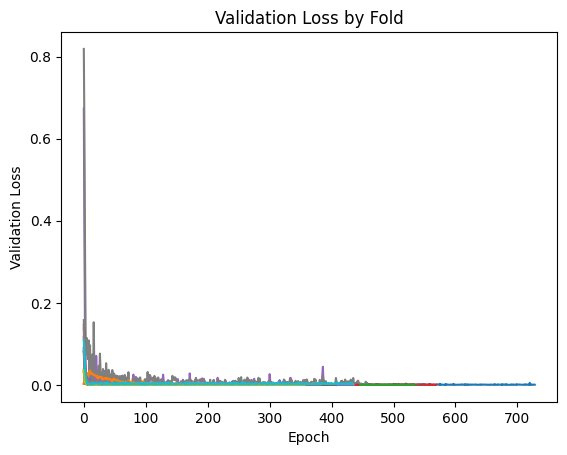

In [ ]:
for fold_idx, fold_loss in enumerate(fold_losses):
    plt.plot(fold_loss, label=f'Fold {fold_idx + 1}')

plt.title('Validation Loss by Fold')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.show()

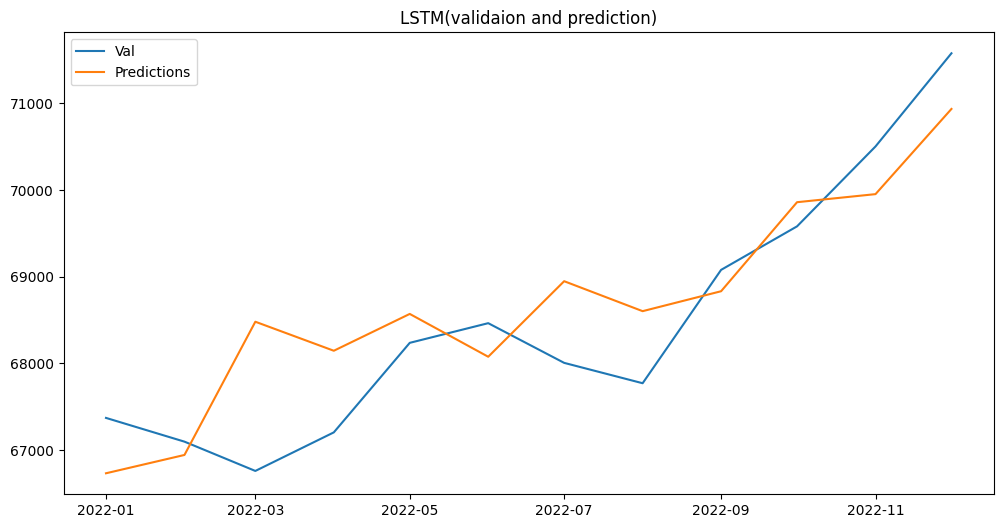

In [ ]:
dates = ["2022-01", "2022-02","2022-03","2022-04","2022-05","2022-06","2022-07","2022-08","2022-09","2022-10","2022-11","2022-12"]
date_objects = [datetime.strptime(date, "%Y-%m") for date in dates]

plt.figure(figsize=(12,6))
plt.title('LSTM(validaion and prediction)')
plt.plot(date_objects, validation[15][0])
plt.plot(date_objects, prediction[15][0])
plt.legend(['Val', 'Predictions'])

In [ ]:
# 36개월 데이터로 모델 학습
model = Sequential()
model.add(LSTM(20, activation='relu', input_shape=(24, 1)))
model.add(Dense(16))
model.add(Dropout(0.1))
model.add(Dense(12))
model.compile(optimizer='adam', loss='mse')

# Early Stopping 설정
early_stopping = EarlyStopping(monitor='loss', patience=100, mode='auto')

# 모델 학습
history = model.fit(data_scaled, target_scaled, epochs=1000, batch_size=1, verbose=2,
                    callbacks=[early_stopping])

Epoch 1/1000
20/20 - 1s - loss: 0.1994 - 1s/epoch - 73ms/step
Epoch 2/1000
20/20 - 0s - loss: 0.1673 - 109ms/epoch - 5ms/step
Epoch 3/1000
20/20 - 0s - loss: 0.1322 - 143ms/epoch - 7ms/step
Epoch 4/1000
20/20 - 0s - loss: 0.0987 - 187ms/epoch - 9ms/step
Epoch 5/1000
20/20 - 0s - loss: 0.0548 - 185ms/epoch - 9ms/step
Epoch 6/1000
20/20 - 0s - loss: 0.0318 - 173ms/epoch - 9ms/step
Epoch 7/1000
20/20 - 0s - loss: 0.0183 - 177ms/epoch - 9ms/step
Epoch 8/1000
20/20 - 0s - loss: 0.0189 - 190ms/epoch - 9ms/step
Epoch 9/1000
20/20 - 0s - loss: 0.0247 - 271ms/epoch - 14ms/step
Epoch 10/1000
20/20 - 0s - loss: 0.0337 - 257ms/epoch - 13ms/step
Epoch 11/1000
20/20 - 0s - loss: 0.0155 - 254ms/epoch - 13ms/step
Epoch 12/1000
20/20 - 0s - loss: 0.0076 - 211ms/epoch - 11ms/step
Epoch 13/1000
20/20 - 0s - loss: 0.0061 - 163ms/epoch - 8ms/step
Epoch 14/1000
20/20 - 0s - loss: 0.0079 - 171ms/epoch - 9ms/step
Epoch 15/1000
20/20 - 0s - loss: 0.0094 - 177ms/epoch - 9ms/step
Epoch 16/1000
20/20 - 0s - loss:

In [ ]:
all_predictions = []  # 예측 결과를 저장할 리스트

# 각 지점에 대해 반복
for idx in range(20):  # 20개 지점에 대해서 반복
    # 해당 지점의 데이터 추출
    data = transposed_df_scaled.iloc[idx, :]  # 지점별 행 데이터 추출

    # 과거 36개월의 데이터를 시퀀스로 만들어 예측에 사용
    sequences = []
    for i in range(len(data) - 35):
        sequence = data[i:i+24].values  # 과거 24개월 데이터 추출
        sequences.append(sequence)

    # 시계열 패턴에 맞게 형태 변환
    x = np.array(sequences)
    x = np.expand_dims(x, axis=-1)  # 차원을 하나 늘려서 (None, 24, 1) 형태로 변환

    # 모델에 입력하고 예측
    predictions = model.predict(x)  # 모델은 이미 훈련되어 있다고 가정

    # 정규화된 예측값을 실제값으로 변환
    predic_23 = target_scaler.inverse_transform(predictions)

    # 예측 결과 저장
    all_predictions.append(predic_23)

# 모든 지점의 예측 결과 출력 또는 분석
for idx, predictions in enumerate(all_predictions):
    print(f"지점 {idx+1} 예측 결과:", predictions)

1/1 [==============================] - 0s 32ms/step
지점 1 예측 결과: [[91601.05  92566.53  92683.37  92722.33  93575.64  92694.414 92536.65
  93810.03  93027.734 94609.414 95149.6   96791.42 ]]
지점 2 예측 결과: [[92023.48  92929.21  93071.59  93323.93  93875.16  93182.64  93131.97
  94236.06  93656.64  95272.58  95536.945 97158.08 ]]
지점 3 예측 결과: [[79941.78  80306.97  80767.61  81151.77  81492.3   81268.25  81059.83
  82088.28  81234.97  82959.195 82782.9   83888.266]]
지점 4 예측 결과: [[85227.07  85913.164 86209.41  86339.03  87021.26  86432.055 86219.24
  87420.234 86509.92  88163.91  88443.945 89781.09 ]]
지점 5 예측 결과: [[178280.94 181986.6  182167.02 181304.83 180289.83 180105.47 177968.97
  181821.58 182707.14 188553.44 188946.03 190118.  ]]
지점 6 예측 결과: [[44371.61  44835.25  45145.754 46652.742 45069.953 45893.645 46987.52
  45260.83  46152.938 46572.52  47589.137 47931.527]]
지점 7 예측 결과: [[78500.39 78876.28 79315.31 79500.59 80166.16 79739.69 79403.91 80616.59
  79517.44 81180.97 81318.32 82444.68]]